In [98]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ml_insights as mli
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)



Starting off w/ just batting statistics (no pitching stuff just yet)
- On Base Percentage (last season avg and last 30 games)
- Slugging Percentage (last season avg and last 30 games) 

In [ ]:
df = pd.read_csv("df_bp1.csv")
df_odds = df[(df.season > 2012) & (df.season <= 2021)]
df_odds.sample(5)

/var/folders/x4/9gxy2p1d4nd09kxmx07_g7b00000gn/T/ipykernel_5604/385569379.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df_bp1.csv")


,date,dblheader_code,day_of_week,team_v,league_v,game_no_v,team_h,league_h,game_no_h,runs_v,runs_h,outs_total,day_night,completion_info,forfeit_info,protest_info,AB_v,H_v,2B_v,3B_v,HR_v,RBI_v,SH_v,SF_v,HBP_v,BB_v,IBB_v,SO_v,SB_v,CS_v,GIDP_v,CI_v,LOB_v,P_num_v,ERind_v,ERteam_v,WP_v,balk_v,PO_v,ASST_v,ERR_v,PB_v,DP_v,TP_v,AB_h,H_h,2B_h,3B_h,HR_h,RBI_h,SH_h,SF_h,HBP_h,BB_h,IBB_h,SO_h,SB_h,CS_h,GIDP_h,CI_h,LOB_h,P_num_h,ERind_h,ERteam_h,WP_h,balk_h,PO_h,ASST_h,ERR_h,PB_h,DP_h,TP_h,misc_info,acqui_info,season,run_diff,home_victory,run_total,date_dblhead,BATAVG_162_h,BATAVG_162_v,BATAVG_30_h,BATAVG_30_v,OBP_162_h,OBP_162_v,OBP_30_h,OBP_30_v,SLG_162_h,SLG_162_v,SLG_30_h,SLG_30_v,OBS_162_h,OBS_162_v,OBS_30_h,OBS_30_v,SB_162_h,SB_162_v,SB_30_h,SB_30_v,CS_162_h,CS_162_v,CS_30_h,CS_30_v,ERR_162_h,ERR_162_v,ERR_30_h,ERR_30_v,ML_h,ML_v,imp_prob_h,imp_prob_v,imp_prob_mid_h
11815,2014-08-07,0,Thu,MIA,NL,114,PIT,NL,114,2,7,51,N,NaN,NaN,NaN,28,3,0,0,1,2,0,0,0,3,0,11,0,1,0,0,2,6,7,7,1,0,24,12,0,0,1,0,35,13,4,0,0,7,0,0,0,2,0,7,1,0,1,0,6,3,2,2,1,0,27,10,0,0,1,0,NaN,Y,2014,5,1,9,201408070,0.254194,0.244746,0.258672,0.247515,0.320624,0.308967,0.333333,0.309936,0.476457,0.438043,0.503469,0.432406,0.797081,0.747011,0.836802,0.742342,92.0,68.0,23.0,12.0,44.0,20.0,9.0,3.0,105.0,96.0,18.0,16.0,-140.0,125.0,0.583333,0.444444,0.569444
13722,2015-06-25,0,Thu,OAK,AL,75,TEX,AL,73,6,3,54,D,NaN,NaN,NaN,35,10,0,0,0,6,0,1,0,4,0,4,0,0,1,0,7,4,3,3,0,0,27,8,0,0,0,0,37,10,3,0,1,3,0,0,0,1,0,8,0,0,0,0,8,5,6,6,0,0,27,12,0,0,1,0,NaN,Y,2015,-3,0,9,201506250,0.249044,0.247842,0.259587,0.269119,0.303951,0.310811,0.317316,0.333039,0.452541,0.451799,0.484759,0.505324,0.756493,0.762609,0.802076,0.838363,104.0,85.0,17.0,19.0,48.0,22.0,7.0,5.0,114.0,128.0,26.0,26.0,130.0,-145.0,0.434783,0.591837,0.421473
17039,2016-08-16,2,Tue,MIL,NL,118,CHN,NL,118,1,4,51,N,NaN,NaN,NaN,31,6,0,0,1,1,0,0,0,4,0,9,1,0,1,0,7,6,4,4,0,0,24,10,0,0,2,0,31,10,2,0,1,4,0,0,0,5,0,3,1,0,1,0,8,4,1,1,1,0,27,10,1,0,1,0,NaN,Y,2016,3,1,5,201608162,0.254678,0.251530,0.258741,0.256798,0.332737,0.323327,0.332133,0.341071,0.528610,0.486366,0.496503,0.514602,0.861347,0.809693,0.828637,0.855674,66.0,156.0,16.0,53.0,37.0,47.0,11.0,12.0,101.0,128.0,11.0,36.0,-191.0,171.0,0.656357,0.369004,0.643677
6061,2012-06-30,0,Sat,CHA,AL,78,NYA,AL,77,0,4,51,D,NaN,NaN,NaN,28,3,0,0,0,0,0,0,1,2,0,13,1,1,1,0,4,1,4,4,0,0,24,7,0,0,1,0,31,8,1,0,3,4,0,0,1,0,0,11,0,0,1,0,4,4,0,0,1,0,27,5,0,0,1,0,NaN,Y,2012,4,1,4,201206300,0.263319,0.254170,0.246320,0.264169,0.335126,0.313761,0.321555,0.318505,0.543796,0.473894,0.541708,0.482229,0.878923,0.787656,0.863262,0.800734,121.0,106.0,16.0,24.0,25.0,43.0,3.0,6.0,88.0,73.0,16.0,13.0,-150.0,130.0,0.600000,0.434783,0.582609
20137,2017-09-19,0,Tue,KCA,AL,150,TOR,AL,151,2,5,51,N,NaN,NaN,NaN,30,6,1,0,1,2,0,1,0,2,0,7,0,0,2,0,4,5,5,5,0,0,24,7,1,0,2,0,31,8,3,0,1,5,0,0,0,0,0,8,0,0,1,0,2,3,2,2,0,0,27,14,0,0,2,0,NaN,Y,2017,3,1,7,201709190,0.241736,0.259766,0.241667,0.272195,0.313435,0.307511,0.304163,0.316850,0.499818,0.505671,0.513889,0.493659,0.813254,0.813182,0.818052,0.810508,55.0,98.0,8.0,12.0,25.0,29.0,5.0,8.0,96.0,82.0,17.0,18.0,-177.0,157.0,0.638989,0.389105,0.624942


In [100]:
df_odds.iloc[4861]

date               2013-09-11
dblheader_code              0
day_of_week               Wed
team_v                    ATL
league_v                   NL
game_no_v                 145
team_h                    MIA
league_h                   NL
game_no_h                 144
runs_v                      2
runs_h                      5
outs_total                 51
day_night                   N
completion_info           NaN
forfeit_info              NaN
protest_info              NaN
AB_v                       34
H_v                         7
2B_v                        3
3B_v                        1
HR_v                        1
RBI_v                       2
SH_v                        0
SF_v                        0
HBP_v                       0
BB_v                        3
IBB_v                       0
SO_v                        8
SB_v                        0
CS_v                        0
GIDP_v                      0
CI_v                        0
LOB_v                       8
P_num_v   

,date,dblheader_code,day_of_week,team_v,league_v,game_no_v,team_h,league_h,game_no_h,runs_v,runs_h,outs_total,day_night,completion_info,forfeit_info,protest_info,AB_v,H_v,2B_v,3B_v,HR_v,RBI_v,SH_v,SF_v,HBP_v,BB_v,IBB_v,SO_v,SB_v,CS_v,GIDP_v,CI_v,LOB_v,P_num_v,ERind_v,ERteam_v,WP_v,balk_v,PO_v,ASST_v,ERR_v,PB_v,DP_v,TP_v,AB_h,H_h,2B_h,3B_h,HR_h,RBI_h,SH_h,SF_h,HBP_h,BB_h,IBB_h,SO_h,SB_h,CS_h,GIDP_h,CI_h,LOB_h,P_num_h,ERind_h,ERteam_h,WP_h,balk_h,PO_h,ASST_h,ERR_h,PB_h,DP_h,TP_h,misc_info,acqui_info,season,run_diff,home_victory,run_total,date_dblhead,BATAVG_162_h,BATAVG_162_v,BATAVG_30_h,BATAVG_30_v,OBP_162_h,OBP_162_v,OBP_30_h,OBP_30_v,SLG_162_h,SLG_162_v,SLG_30_h,SLG_30_v,OBS_162_h,OBS_162_v,OBS_30_h,OBS_30_v,SB_162_h,SB_162_v,SB_30_h,SB_30_v,CS_162_h,CS_162_v,CS_30_h,CS_30_v,ERR_162_h,ERR_162_v,ERR_30_h,ERR_30_v,ML_h,ML_v,imp_prob_h,imp_prob_v,imp_prob_mid_h
4861,2012-04-04,0,Wed,SLN,NL,1,MIA,NL,1,4,1,54,N,NaN,NaN,NaN,37,13,3,0,0,4,1,0,0,3,2,5,1,1,0,0,10,4,1,1,0,0,27,10,0,0,1,0,30,4,1,0,0,1,0,0,1,0,0,6,0,0,1,0,3,5,4,4,0,0,27,12,0,0,2,0,NaN,Y,2012,-3,0,5,201204040,NaN,0.2735,NaN,0.289216,NaN,0.338327,NaN,0.348607,NaN,0.513919,NaN,0.534314,NaN,0.852246,NaN,0.882921,NaN,57.0,NaN,13.0,NaN,39.0,NaN,8.0,NaN,116.0,NaN,28.0,-180.0,160.0,0.642857,0.384615,0.629121
4865,2012-04-05,0,Thu,MIA,NL,2,CIN,NL,1,0,4,51,D,NaN,NaN,NaN,29,3,1,0,0,0,0,0,0,2,0,8,0,1,0,0,4,3,4,4,0,0,24,13,1,0,1,0,30,10,4,0,1,4,1,1,1,4,2,5,0,0,1,0,9,3,0,0,0,0,27,14,1,0,1,0,NaN,Y,2012,4,1,4,201204050,0.256237,NaN,0.243810,NaN,0.320970,NaN,0.305944,NaN,0.490912,NaN,0.490476,NaN,0.811882,NaN,0.796420,NaN,97.0,NaN,18.0,NaN,50.0,NaN,10.0,NaN,91.0,NaN,16.0,NaN,-130.0,110.0,0.565217,0.476190,0.544513
4887,2012-04-07,0,Sat,MIA,NL,3,CIN,NL,2,8,3,54,N,NaN,NaN,NaN,38,12,3,1,3,8,0,0,0,5,0,9,3,0,1,0,8,2,3,3,0,0,27,15,1,0,1,0,32,6,0,1,2,3,1,0,0,0,0,6,0,0,1,0,3,5,8,8,0,0,27,10,0,0,1,0,NaN,Y,2012,-5,0,11,201204070,0.256108,NaN,0.244423,NaN,0.320905,NaN,0.305704,NaN,0.490637,NaN,0.485936,NaN,0.811542,NaN,0.791640,NaN,97.0,NaN,17.0,NaN,50.0,NaN,9.0,NaN,91.0,NaN,17.0,NaN,-135.0,115.0,0.574468,0.465116,0.554676
4901,2012-04-08,0,Sun,MIA,NL,4,CIN,NL,3,5,6,52,D,NaN,NaN,NaN,36,11,1,1,0,5,0,1,1,0,0,7,2,0,1,0,6,4,6,6,0,0,25,8,0,0,0,0,33,8,1,0,2,6,0,0,0,3,0,7,0,0,0,0,5,3,4,4,0,0,27,6,1,0,1,0,NaN,Y,2012,1,1,11,201204080,0.256058,NaN,0.244423,NaN,0.320254,NaN,0.305085,NaN,0.491091,NaN,0.493695,NaN,0.811345,NaN,0.798780,NaN,96.0,NaN,16.0,NaN,49.0,NaN,9.0,NaN,91.0,NaN,17.0,NaN,-125.0,105.0,0.555556,0.487805,0.533875
4918,2012-04-09,0,Mon,MIA,NL,5,PHI,NL,4,6,2,54,D,NaN,NaN,NaN,35,11,3,0,3,6,0,0,0,0,0,11,2,1,2,0,2,4,2,2,0,1,27,10,0,0,0,0,33,6,1,0,0,2,0,0,0,1,0,8,1,0,0,0,5,4,5,5,0,0,27,14,1,0,2,0,NaN,Y,2012,-4,0,8,201204090,0.249865,NaN,0.241935,NaN,0.315927,NaN,0.308225,NaN,0.470293,NaN,0.409867,NaN,0.786220,NaN,0.718092,NaN,99.0,NaN,16.0,NaN,23.0,NaN,1.0,NaN,73.0,NaN,16.0,NaN,-150.0,130.0,0.600000,0.434783,0.582609


In [79]:
features = ["OBP_162_h", "OBP_162_v", "SLG_162_h", "SLG_162_v"]

target = "home_victory"

X = df_odds.loc[:,features]
y = df_odds[target]

# TODO: Redo how we split data into training and testing splits --> try to keep the original df so that we can plot some of the results/outputs?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [54]:
print(X_train.head())

       OBP_162_h  OBP_162_v  SLG_162_h  SLG_162_v
11632        0.0        0.0        0.0        0.0
12870        0.0        0.0        0.0        0.0
7689         0.0        0.0        0.0        0.0
23753        0.0        0.0        0.0        0.0
15061        0.0        0.0        0.0        0.0


In [52]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5338589043864969


(array([0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 4.00e+00, 9.00e+00, 1.30e+01, 1.20e+01, 1.10e+01,
        2.50e+01, 3.30e+01, 4.50e+01, 7.10e+01, 8.70e+01, 1.00e+02,
        1.19e+02, 1.53e+02, 2.35e+02, 1.76e+02, 2.72e+02, 3.30e+02,
        3.44e+02, 4.42e+02, 4.92e+02, 4.56e+02, 4.56e+02, 7.63e+02,
        6.69e+02, 7.05e+02, 7.52e+02, 7.42e+02, 9.90e+02, 1.29e+03,
        8.62e+02, 9.13e+02, 9.89e+02, 9.58e+02, 1.29e+03, 8.00e+02,
        9.29e+02, 9.98e+02, 8.63e+02, 8.53e+02, 8.35e+02, 8.13e+02,
        5.82e+02, 8.11e+02, 3.43e+02, 4.25e+02, 2.75e+02, 3.30e+02,
        1.91e+02, 2.49e+02, 1.38e+02, 1.49e+02, 1.12e+02, 7.20e+01,
        5.30e+01, 4.90e+01, 1.90e+01, 1.60e+01, 8.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 0.00e+00, 0.00e+00]),
 array([0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25,
        0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36,
        0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44

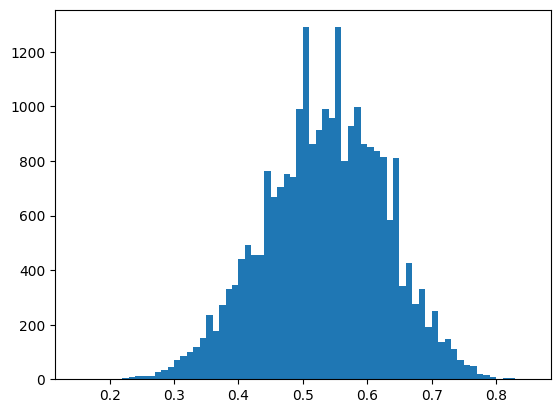

In [31]:
# Shape of what the Vegas odds are for the games
plt.hist(df_odds.imp_prob_mid_h, bins=np.linspace(.15,.85,71))

(array([2.100e+01, 1.200e+01, 4.000e+00, 6.000e+00, 4.000e+00, 1.000e+00,
        9.000e+00, 1.000e+01, 1.000e+01, 4.000e+00, 1.100e+01, 1.300e+01,
        8.000e+00, 6.000e+00, 3.310e+02, 4.250e+02, 5.510e+02, 4.150e+02,
        5.490e+02, 8.130e+02, 1.496e+03, 1.430e+03, 1.912e+03, 1.914e+03,
        2.287e+03, 9.890e+02, 9.960e+02, 1.330e+03, 7.850e+02, 1.218e+03,
        7.230e+02, 2.540e+02, 4.110e+02, 4.190e+02, 6.450e+02, 2.560e+02,
        3.380e+02, 4.850e+02, 2.260e+02, 3.370e+02, 1.460e+02, 1.840e+02,
        1.810e+02, 1.420e+02, 1.580e+02, 2.320e+02, 2.310e+02, 8.230e+02,
        6.000e+00, 6.000e+00, 4.000e+00, 1.100e+01, 6.000e+00, 0.000e+00,
        6.000e+00, 6.000e+00, 6.000e+00, 4.000e+00, 9.000e+00, 4.000e+00]),
 array([1.   , 1.001, 1.002, 1.003, 1.004, 1.005, 1.006, 1.007, 1.008,
        1.009, 1.01 , 1.011, 1.012, 1.013, 1.014, 1.015, 1.016, 1.017,
        1.018, 1.019, 1.02 , 1.021, 1.022, 1.023, 1.024, 1.025, 1.026,
        1.027, 1.028, 1.029, 1.03 , 1.031, 1.

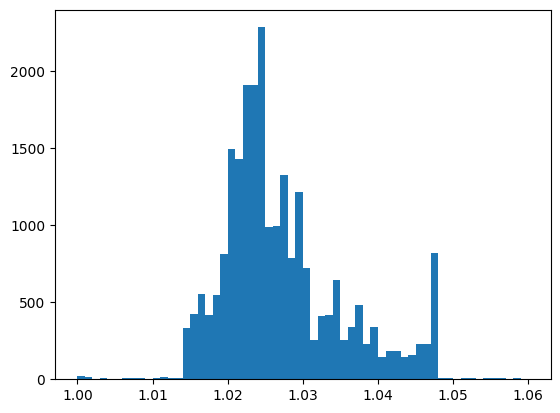

In [32]:
# Visualize the vig on Vegas' odds and how they always have an edge of 2% on any side of a bet
plt.hist(df_odds.imp_prob_h + df_odds.imp_prob_v, bins=np.linspace(1,1.06,61))

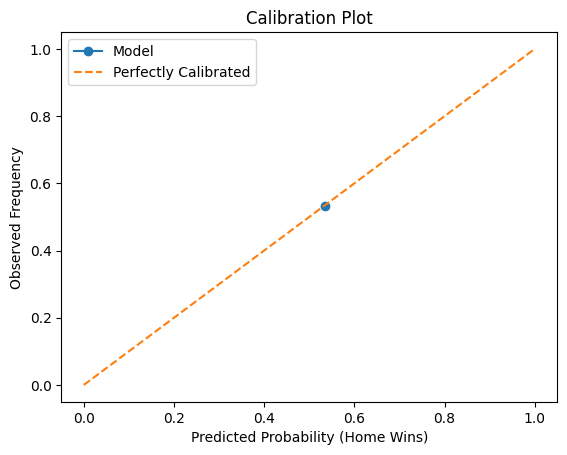

In [42]:
y_prob = model.predict_proba(X_test)[:, 1]  # probability home team wins

from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability (Home Wins)')
plt.ylabel('Observed Frequency')
plt.title('Calibration Plot')
plt.legend()
plt.show()
